### Tutorial Overview

This file illustrates basic usage of the python_gclda toolbox. Specifically, we do the following steps:

* Import the python modules
* Build a python dataset object, and import data into the object from raw text files containing all data that the gcLDA model uses
* Build a gclda model object instance
* Train the gclda model object (using fewer iterations than should be used for actual modeling)
* Export figures 

Note: this tutorial will assume that your working directory is the '/examples' subdirectory within the gclda package. If it is not, the relative paths to the datasets need to be modified for	creating the variable 'datasetLabel' below


In [2]:
# Import packages
from python_gclda_package.gclda_dataset import gclda_dataset
from python_gclda_package.gclda_model   import gclda_model
import os


Importing 'gclda_dataset.py'
Importing 'gclda_model.py'


### Create a dataset object instance and import data

For this tutorial, we use a subset of 1000 documents from the neurosynth dataset. 
This will run faster, but produce sparser and noisier topics than the full dataset


In [3]:
# Create dataset object instance: 'dat'
# Inputs:
datasetLabel  ='2015Filtered2_1000docs' # The directory name containing the dataset .txt files, which will be used as a 'dataset label'
datasetDirectory =	'../datasets/neurosynth/'# The relative path from the working directory to the root-directory containing the dataset folder
dat = gclda_dataset(datasetLabel,datasetDirectory) # Create dataset object 'dat'
# Import data from all files that are in dataset directory:
dat.importAllData()
# View dataset object after importing data:
dat.displayDatasetSummary()


--- Dataset Summary ---
	 self.datasetLabel  = '2015Filtered2_1000docs'
	 self.dataDirectory = '../datasets/neurosynth/'
	 # word-types:   6755
	 # word-indices: 40874
	 # peak-indices: 34213
	 # documents:    1000
	 # peak-dims:    3


### Create a gclda model object

For this tutorial, we will create gclda model instance, using T=100 topics, R=2 subregions per topic, and default values for all other hyper-parameters (See other sample scripts and documentation for details about all hyperparameters)

In [4]:
T = 100 # Number of topics
R = 2 # Number of subregions in the gaussian mixture model used for each topic's spatial distribution

# Create the model instance
model = gclda_model(dat, T, R)
# Randomly initialize the model
model.initialize()
# View the model after initialization:
model.displayModelSummary()

Constructing GC-LDA Model
Initializing GC-LDA Model
--- Model Summary ---
 Current State:
	 Current iteration   = 0
	 Initialization Seed = 1
	 Current Log-Likely  = -798038
 Model Hyper-Parameters:
	 Symmetric = False
	 nt    = 100
	 nr    = 2
	 alpha = 0.100
	 beta  = 0.010
	 gamma = 0.010
	 delta = 1.000
	 roi   = 50.000
	 dobs  = 25
 Model Training-Data Information:
	 Dataset Label        = 2015Filtered2_1000docs
	 # Word-Tokens (nz)   = 40874
	 # Peak-Tokens (ny)   = 34213
	 # Word-Types (nw)    = 6755
	 # Documents (nd)     = 1000
	 # Peak-Dimensions    = 3


### Model Training

We will train for just a few iterations for the sake of time here (should take about 5 minutes). 
When training a full model, we recommend running for at least 1000 total iterations

In [4]:
iterations = 25
# During training, the model will print details about the model log-likelihood, etc., to the console.
# The first parameter we pass controls how often we compute the log-likelihood (which slows inference down slightly)
# The second parameter controls how much information gets printed to the console (0 = minimal, 2 = maximal) 
for i in range(iterations):
    model.runCompleteIteration(1,1)


Iter 01 Log-likely: x =  -503509.4, w =  -285399.5, tot =  -788908.9
Iter 02 Log-likely: x =  -502483.4, w =  -277888.2, tot =  -780371.6
Iter 03 Log-likely: x =  -500573.4, w =  -273290.2, tot =  -773863.6
Iter 04 Log-likely: x =  -498206.3, w =  -270078.0, tot =  -768284.2
Iter 05 Log-likely: x =  -495543.3, w =  -267570.5, tot =  -763113.8
Iter 06 Log-likely: x =  -492314.9, w =  -265750.5, tot =  -758065.4
Iter 07 Log-likely: x =  -488836.8, w =  -264311.0, tot =  -753147.9
Iter 08 Log-likely: x =  -485107.5, w =  -263155.8, tot =  -748263.3
Iter 09 Log-likely: x =  -481350.9, w =  -262252.8, tot =  -743603.7
Iter 10 Log-likely: x =  -478130.2, w =  -261581.0, tot =  -739711.2
Iter 11 Log-likely: x =  -475200.8, w =  -260948.6, tot =  -736149.4
Iter 12 Log-likely: x =  -472497.1, w =  -260441.0, tot =  -732938.2
Iter 13 Log-likely: x =  -470148.4, w =  -259869.1, tot =  -730017.5
Iter 14 Log-likely: x =  -468056.8, w =  -259500.9, tot =  -727557.7
Iter 15 Log-likely: x =  -466114.4

### Export figures for trained model

Here we export figures to file illustrating all topics in our trained model. Results will be placed into the subdirectories in the folder: 'examples/gclda_tutorial_results/' based on model parameter settings and how many iterations have run.

Note that these topics will be **much** noiser than for a properly trained model (although some of the topics in these example results will capture known functional regions; e.g., topics 14/15). For results similar to those presented in our papers, you should
* Use the complete dataset (and appropriate hyper-parameter settings)
* Train until log-likelihood converges 




In [5]:
# Set up a rootdirectory to serve as a directory to store all tutorial results
results_rootdir = 'gclda_tutorial_results' # We note that these results come from the tutorial, as opposed to the scripts for running full models
if not os.path.isdir(results_rootdir):
	os.mkdir(results_rootdir)

# We first use the method 'getModelDisplayString' to get a string identifier that is unique to the combination of:
#  - DatasetLabel
#  - All Model hyperparameters
# This is useful for saving model output

# Get model string identifier to use as a results directory
modelString = model.getModelDisplayString()
# Append the current model iteration to this directory name
outputDirectory_data = results_rootdir + "/" + modelString + "_Iteration_%d/" % model.iter
# We create a subdirectory of the outputdirectory to store figures
outputDirectory_figures = outputDirectory_data + "Figures/"

# Export some files giving topic-word distributions, as well as detailed accounts of all token->assignments
model.printAllModelParams(outputDirectory_data)
# Export Figures illustrating the spatial-extent and high probability word-types for the each topic in the model
model.printTopicFigures(outputDirectory_figures, 1)


### View a few of the saved image files illustrating topics

The easiest way to view all topic images is to just browse the results folder. 

For illustrative purposes, I've selected a couple of the cleaner topics that get extracted in the tutorial to view directly in the notebook.

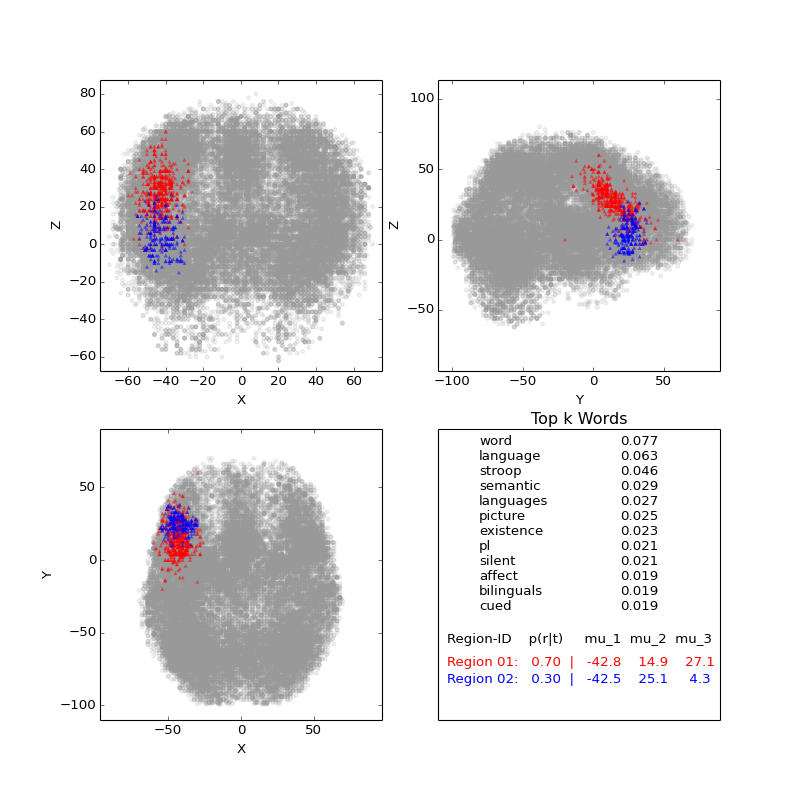

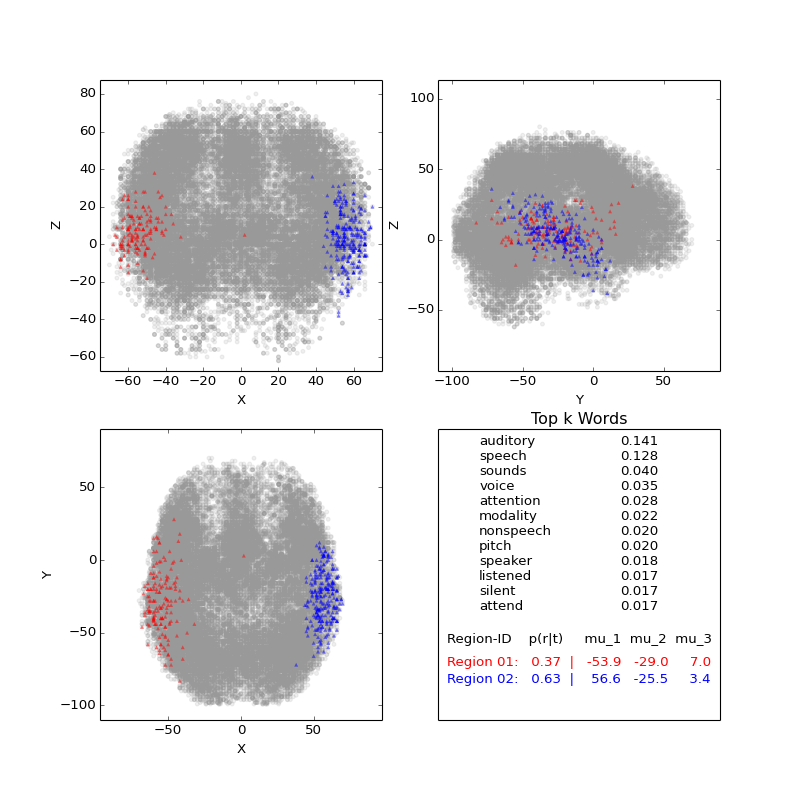

In [13]:
from IPython.display import Image
from IPython.display import display 
display(Image(filename='gclda_tutorial_results/2015Filtered2_1000docs_100T_2R_alpha0.100_beta0.010_gamma0.010_delta1.000_25dobs_50.0roi_0symmetric_1_Iteration_25/Figures/Topic_15.png'))
display(Image(filename='gclda_tutorial_results/2015Filtered2_1000docs_100T_2R_alpha0.100_beta0.010_gamma0.010_delta1.000_25dobs_50.0roi_0symmetric_1_Iteration_25/Figures/Topic_60.png'))